<a href="https://colab.research.google.com/github/andrewgodbout/F2025CS1910/blob/main/CaseStudies/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Case Study

(fun with images ?!?!)

Python has several libraries for representing images and there are various formats for images. In this case study we will consider that an image is a grid of pixels. Pixels are either grayscale values (integers) or colour values (RGB) (list of 3 integers).

So for our purpose an image is either a grid of integers:


```python
gray_image = [[0, 0, 0, 255],
              [0, 0, 255, 0],
              [0, 255, 0, 0],
              [255, 0, 0, 0] ]
```

or a grid of [R, G, B] values:

```python
color_image = [ [ [100, 0, 200], [100, 0, 200], [100, 0, 200]],
                [ [100, 0, 200], [100, 0, 200], [100, 0, 200]],
                [ [100, 0, 200], [100, 0, 200], [100, 0, 200]],
                [ [100, 0, 200], [100, 0, 200], [100, 0, 200]] ]
```





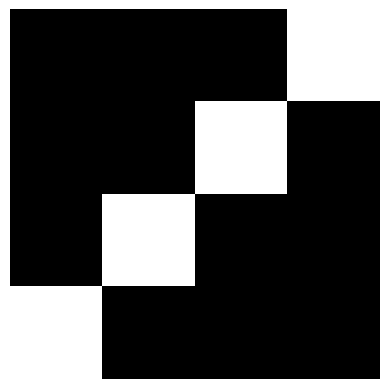

In [ ]:
# display the example images
import matplotlib.pyplot as plt

# white on the anti-diagonal
gray_image = [[0, 0, 0, 255],
              [0, 0, 255, 0],
              [0, 255, 0, 0],
              [255, 0, 0, 0] ]



plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.show()

height: 4
width: 3


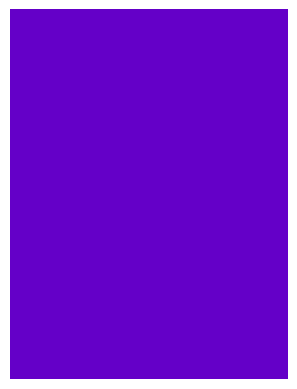

In [ ]:

# red plus blue make purple
color_image = [ [ [100, 0, 200], [100, 0, 200], [100, 0, 200]],
                [ [100, 0, 200], [100, 0, 200], [100, 0, 200]],
                [ [100, 0, 200], [100, 0, 200], [100, 0, 200]],
                [ [100, 0, 200], [100, 0, 200], [100, 0, 200]] ]

#height is 4 width is 3

print(f"height: {len(color_image)}")
print(f"width: {len(color_image[0])}")
plt.imshow(color_image)
plt.axis("off")
plt.show()

height: 750
width: 1000


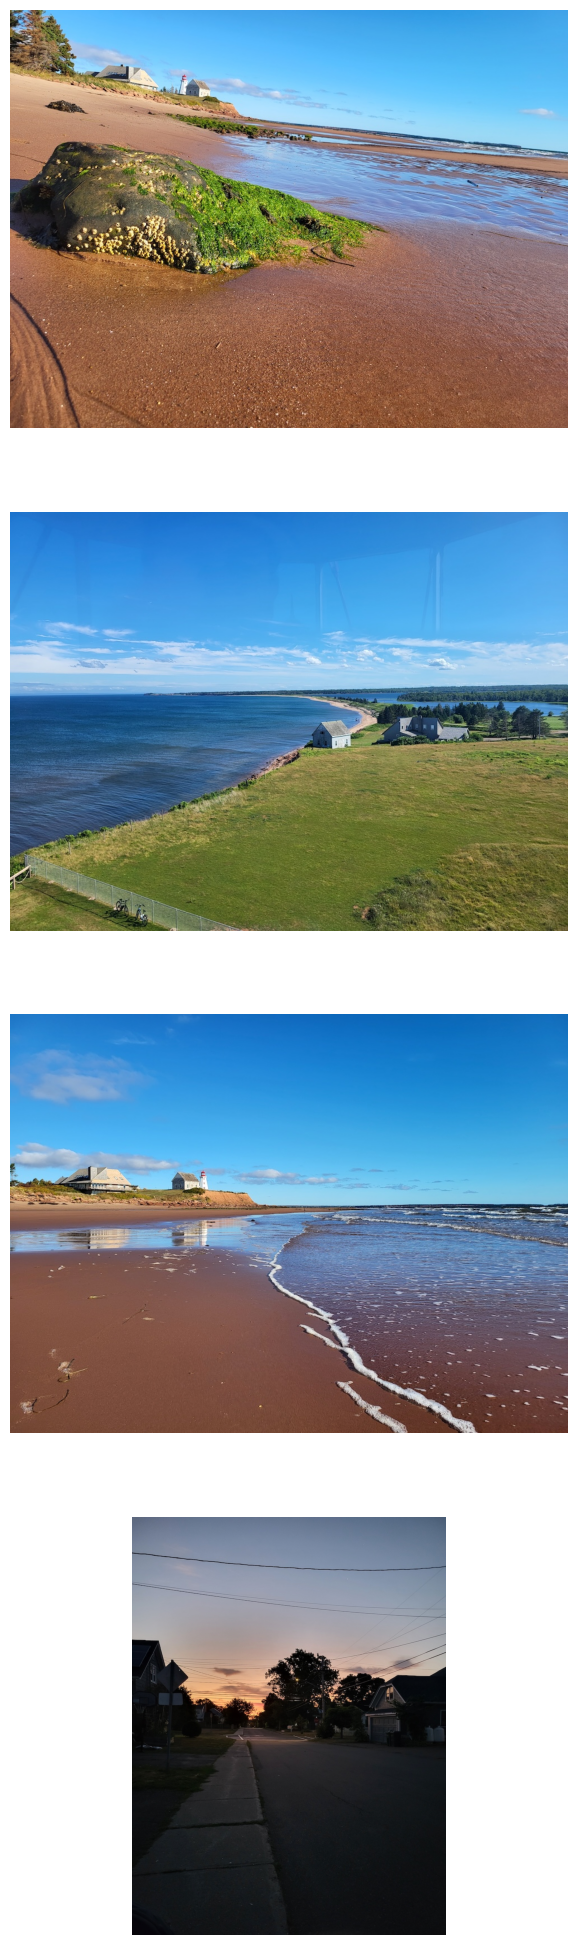

In [2]:
## Read in some images
import matplotlib.pyplot as plt

import requests
from PIL import Image
import numpy as np
import io

# helper function to convert jpg image into a 2D List of pixels
def load_jpg(url):
    """
    Loads a JPG image from a URL and converts it to a 2D list.

    Args:
        url (str): The URL of the JPG image.

    Returns:
        list: A 2D list of pixel values (for grayscale image) or a
              3D list (for color image).
    """
    # 1. Download the image from the URL
    response = requests.get(url)
    response.raise_for_status() # Raise an exception for bad status codes

    # 2. Open the image using Pillow from the in-memory bytes
    image_bytes = io.BytesIO(response.content)
    img = Image.open(image_bytes)

    # Convert to grayscale to get a single 2D array
    # If you want RGB, skip this step. A color image is a 3D array (height x width x channels)
    #img_gray = img.convert('L')

    # 3. Convert the Pillow Image object to a NumPy array
    img_np_array = np.asarray(img)

    # 4. Convert the NumPy array to a native Python 2D list
    img_2d_list = img_np_array.tolist()

    return img_2d_list


image_urls = ["https://raw.githubusercontent.com/andrewgodbout/F2025CS1910/refs/heads/main/CaseStudies/images/green_rock.jpg",
              "https://raw.githubusercontent.com/andrewgodbout/F2025CS1910/refs/heads/main/CaseStudies/images/lighthouse_top.jpg",
              "https://raw.githubusercontent.com/andrewgodbout/F2025CS1910/refs/heads/main/CaseStudies/images/panmure_beach.jpg",
              "https://raw.githubusercontent.com/andrewgodbout/F2025CS1910/refs/heads/main/CaseStudies/images/sunrise.jpg"
]

fig = plt.figure(figsize=(50, 25))
im_green_rock = load_jpg(image_urls[0])
fig.add_subplot(4, 1, 1)
plt.axis("off")
plt.imshow(im_green_rock)


print(f"height: {len(im_green_rock)}")
print(f"width: {len(im_green_rock[0])}")

im_light_house = load_jpg(image_urls[1])
fig.add_subplot(4, 1, 2)
plt.axis("off")
plt.imshow(im_light_house)

im_panmure = load_jpg(image_urls[2])
fig.add_subplot(4, 1, 3)
plt.axis("off")
plt.imshow(im_panmure)

im_sunrise = load_jpg(image_urls[3])
fig.add_subplot(4, 1, 4)
plt.axis("off")
plt.imshow(im_sunrise)

plt.show()


## Find a group

3-5 people

- Ensure everyone understands how a color image is a 3D list of numbers and a grayscale image is a 2D list of numbers

- Discuss how to compute the height and width of an image

- Discuss how to visit each pixel in an image

### Warm-up exercises

Complete the 3 warm-up exercises below:

1. **Color inversion**

Write a function to invert the colors of the image. To invert the colors subtract them from 255.

Consider a pixel in an image is purple: rgb = [100, 0, 200] then it will become: [255- 100, 255-0, 255-200] = [155, 255, 55] (green-yellow)

2. **Warm Filter**

Blue is considered a cold color while red is considered warm. We call a filter a warm-filter if it reduces the blue and increases the red for each pixel in an image.

Write a function called `warm_filter` that accepts as input an img (as a 3D list) and returns a new 3D list such that each pixel in the input has their red component increased by 25 (but not above 255) and each blue component reduced by 25 (but not below 0).

3. **Convert to Grayscale**

Sometimes a grayscale image is called an intensity image, to convert a color image to a grayscale or intensity image we can use the following formula on each pixel in the image:

`intensity = 0.34 * r + 0.5 * g + 0.16 * b`

remember that a grayscale image is a 2D list, while a color image is a 3D list.

Write a function to convert a color image to a grayscale image, make sure your method returns a 2D list of intensity values.


In [3]:
# Warm-up Color Inversion


def color_invert(img_list):
    """ Given a color image as a 3D list return a copy of the image where the colors have been inverted

        If a given pixel has R, G, B as [ r_c, g_c, b_c ] then it is inverted by subtracting each value from 255
        the pixel becomes [ 255 - r_c, 255 - g_c, 255 - b_c]

        This method inverts all of the pixels in an image

        return: a copy of img_list where each pixel has been color inverted

    """
    #the image that this method will return
    inverted_img = [ ]

    #get the height and width
    height = len(img_list)
    width = len(img_list[0])

    #use a nested for loop to visit each pixel and then append the result to inverted_img
    for row in range(height):
        #create a row of pixels to store the inverted pixels
        im_row = []
        for col in range(width):
            #create the pixel to represent [R,G,B]
            pixel = []

            #do the inversion (replace the below with the actual calculation
            pixel.append(0)
            pixel.append(0)
            pixel.append(0)

            im_row.append(pixel)


        #append the new row to the image
        inverted_img.append(im_row)


    #finally return the result
    return inverted_img


In [ ]:
# Warm-up warm-filter

def warm_filter(img_list):
    """ Apply a warm-filter to img_list

        img_list: a 3D list representing a color image

        return: a 3D list representing a warmer version of img_list

    """
    ...



In [ ]:
# Warm-up convert to gray

def grayscale(img_list):
    """ Convert a color image to a grayscale image

        the gray intensity of each RGB pixel is calculated as:
        intensity = 0.34 * R + 0.5 * G + 0.16 * B

        img_list: a 3D list representing a color image

        return: a 2D list representing a gray or intensity image
    """
    ...

## Testing

Before you apply your code to a large complex image. Try your function on a smaller easiler to interpret image.

See below 3 simple images.

Alter the `input_img` and `fn` variables to test your function on an image that allows you to (hopefully) interpret your results to ensure they look correct before moving onto full sized complex images

original image:
[[[0, 0, 0]]]
augmented image:
[[[0, 0, 0]]]


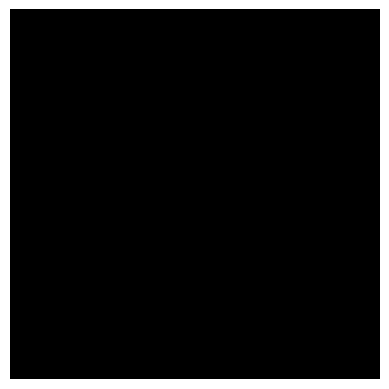

In [4]:
# testing your methods
import pprint
import matplotlib.pyplot as plt

# test your methods on a simple image:

simple1 = [ [ [0, 0, 0] ] ]

simple2 = [ [ [255, 255, 255] ] ]

simple3 = [ [ [0, 0, 0], [0, 0, 0], [0, 0, 0] ],
            [ [0, 0, 0], [255, 255, 255], [0, 0, 0]],
            [ [0, 0, 0], [0, 0, 0], [0, 0, 0] ] ]

#set the image you want to test (simple1 simple2 or simple3
input_img = simple1

#set the function you want to call (color_invert warm_filter or grayscale)
fn = color_invert


# call the method you want to test
augmented_img = fn(input_img)


# visualize the result

#ensure the original did not change
print("original image:")
pprint.pprint(input_img)

#check the augmented result
print("augmented image:")
pprint.pprint(augmented_img)


#for a grayscale image add cmap="gray"
plt.imshow(augmented_img)
plt.axis("off")
plt.show()



## View the Results

Once your tests look ok, in the below code cell set the `input_img` and `fn` variables to test your functions on the original images


height: 750
width: 1000


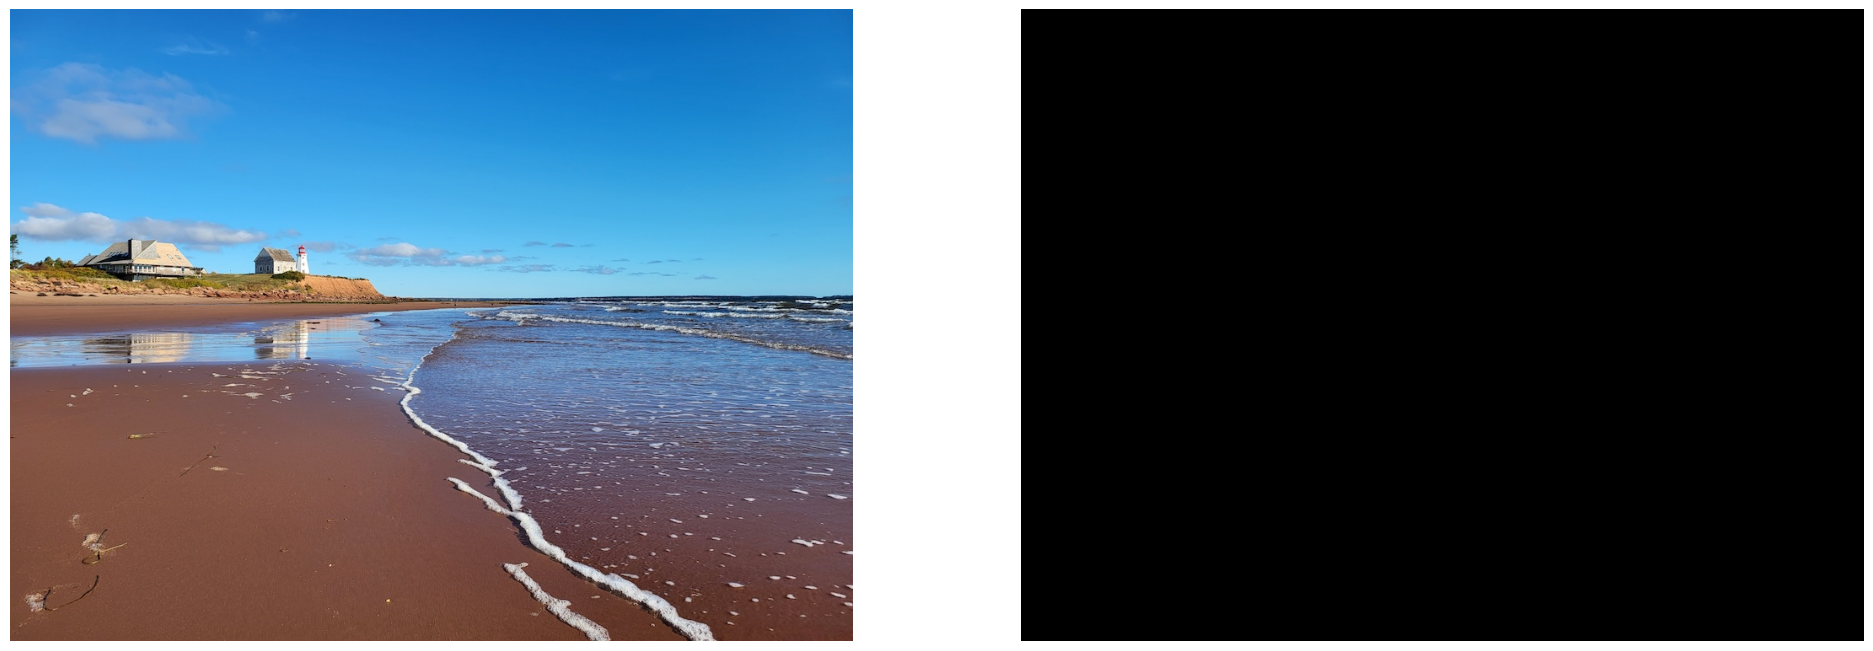

In [7]:
# apply your functions to the larger images to see the results

# testing your methods
import pprint
import matplotlib.pyplot as plt

#set the image you want to test
#im_green_rock im_panmure im_light_house im_sunrise

input_img = im_panmure

#set the function you want to call
#color_invert warm_filter grayscale
fn = color_invert


# call the method you want to test
augmented_img = fn(input_img)


# visualize the result

print(f"height: {len(augmented_img)}")
print(f"width: {len(augmented_img[0])}")
fig = plt.figure(figsize=(50, 25))

fig.add_subplot(1, 4, 1)
plt.axis("off")
plt.imshow(input_img)


fig.add_subplot(1, 4, 2)
plt.axis("off")

#for grayscale ensure to add cmap="gray" to the below argument list
plt.imshow(augmented_img)

plt.show()


# Spatial Filters

In the warm-up exercises we calculated values while investigating only the individual pixel. We didn't look beyond the pixel. i.e., we did a calculation at each pixel but without any additional spatial context.

Spatial filters will consider the neighbourhood of pixels around a particular pixel.

In the next section we will implement 2 spatial filters

1. **Averaging Filter**

 - this filter will replace each pixel in an image with the average of the values from a neighbourhood surrounding the pixel

 - it is considers a low pass filter, it allows slow changes to pass through while removing high (drastic) changes

 - it has the effect of blurring or smoothing the image

 - if a white pixel is surrounded by black pixels it will take on a more gray color (average).

 - our implementation will use an average where each neighbouring pixel will get the same weight, but other versions exist where further neighbours may have less weight (a gaussian filter for example).

 - Q: how to compute the average?
 - Q: If sz is 1 how many pixels determine the average? what if sz is 2? formula?

2. **Median Filter**

   - consider a neighbourhood of pixels around a given pixel and replace the pixel with the median value

   - removes noise
  
   - preserves edges
  

Something to consider:

### how to handle pixels near the edge of the image?

1. pad with zeros
2. replicate the edge/border pixels
3. wrap the pixels to the other side of the image
4. ignore them (only apply the filter on the interior pixels)


We'll use the ignore them approach but you are welcome to try other strategies in your own time




In [9]:
# smooth or blur

# implement your averaging filter

def average(img_list, sz):
    """
        for each pixel in img_list replace the pixel with the average
        of the neighbouring pixels, i.e, the R value is the average of the
        Red values of the neighbours


        sz: the size of the neighbourhood. e.g., if sz is 1 then the neighbourhood contains
            all pixels +-1 away in each of the eight directions

        img_list: an RGB image

        return: a new image that contains the blurred or averaged pixels from the original


        Example: if sz is 1 then the neighbourhood is a 3x3 grid around the pixel Y:

        X X X
        X Y X
        X X X

        i.e., we go 1 pixel in all 8 directions around Y to compute the average

        since the neighbourhood has 9 total pixels (Y plus 8 neighbours) we add 1/9 of each pixel to get our final value.

        Ensure the final result is an integer by rounding to the closest integer value.
        Do this for each of the R, G and B components in a pixel

        If sz is 2 then we take a 5x5 grid centered at pixel Y:

        X X X X X
        X X X X X
        X X Y X X
        X X X X X
        X X X X X

        this time we take 1/25 of each pixel value to compute the average


    """
    #the image that this method will return
    blurred_img = [ ]

    R = 0
    G = 1
    B = 2

    #get the height and width
    height = len(img_list)
    width = len(img_list[0])

    #use a nested for loop to visit each pixel and then append the result to inverted_img
    for row in range(height):
        #create a row of pixels to store the inverted pixels
        im_row = []
        for col in range(width):
            pixel = []
            #pixels within sz of the edge just copy them over (do not blur them)

            if row < sz or row >= height - sz:
                pixel.append(img_list[row][col][R])
                pixel.append(img_list[row][col][G])
                pixel.append(img_list[row][col][B])
            elif col < sz or col >= width - sz:
                pixel.append(img_list[row][col][R])
                pixel.append(img_list[row][col][G])
                pixel.append(img_list[row][col][B])
            else:
                #non-edge case we want to average the neighbours
                r_avg = 0
                g_avg = 0
                b_avg = 0
                for i in range(row - sz, row + sz):
                    for j in range(col - sz, col + sz):
                        ...

            im_row.append(pixel)

        #append the new row to the image
        blurred_img.append(im_row)


    #finally return the result
    return blurred_img




In [ ]:
# median filter
def median(img_list, sz):
    """
        Perform a median filtering on img_list to produce a new img as the original

        Look within the neighbourhood of pixels within sz away from each pixel and replace
        the pixel with the median from that neighbourhood


        img_list: the 3D list representing the color image
        sz: the size of neighbourhood to use for calculating the median


        return: a new image where each pixel is replaced by the median from the neighbourhood

    """

    #the image that this method will return
    median_img = [ ]

    R = 0
    G = 1
    B = 2

    #get the height and width
    height = len(img_list)
    width = len(img_list[0])

    #use a nested for loop to visit each pixel and then append the result to inverted_img
    for row in range(height):
        #create a row of pixels to store the inverted pixels
        im_row = []
        for col in range(width):
            pixel = []
            #pixels within sz of the edge just copy them over (do not blur them)

            if row < sz or row >= height - sz:
                pixel.append(img_list[row][col][R])
                pixel.append(img_list[row][col][G])
                pixel.append(img_list[row][col][B])
            elif col < sz or col >= width - sz:
                pixel.append(img_list[row][col][R])
                pixel.append(img_list[row][col][G])
                pixel.append(img_list[row][col][B])
            else:
                #non-edge case we want to find the median
                r = []
                g = []
                b = []

                for i in range(row - sz, row + sz):
                    for j in range(col - sz, col + sz):
                      ...


            im_row.append(pixel)

        #append the new row to the image
        median_img.append(im_row)


    #finally return the result
    return median_img



original image:
[[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [255, 255, 255], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]
augmented image:
[[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 3) + inhomogeneous part.

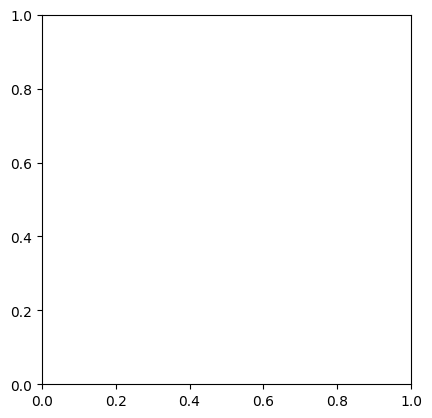

In [11]:
# testing

# testing your methods
import pprint
import matplotlib.pyplot as plt

# test your methods on a simple image:
simple3 = [ [ [0, 0, 0], [0, 0, 0], [0, 0, 0] ],
            [ [0, 0, 0], [255, 255, 255], [0, 0, 0]],
            [ [0, 0, 0], [0, 0, 0], [0, 0, 0] ] ]


#255 / 9 is 28

#set the image you want to test: simple3
input_img = simple3

#set the function you want to call (average or median)
fn = average


# call the method you want to test
augmented_img = fn(input_img, 1)


# visualize the result

#ensure the original did not change
print("original image:")
pprint.pprint(input_img)

#check the augmented result
print("augmented image:")
pprint.pprint(augmented_img)


#for a grayscale image add cmap="gray"
plt.imshow(augmented_img)
plt.axis("off")
plt.show()


# Sharpening

In our prior task we computed a low pass filter (we smoothed the image). Low pass means we let the slow changes flow through the filter while removing the more dramatic changes.

If we take the difference between the original image and the smoothed image we will get back the high pass information.

In this task:

1. compute the high pass image by first computing the difference between the original and the smoothed image
    i.e., high_pass = original - smoothed

2. amplify the high pass features by adding them back into the original.

   i.e., sharpened_image = original + high_pass




In [ ]:
#sharpen

def sharpen(orig, smooth):
    """
        sharpen an image

        1. compute the diff image as the element-wise subtraction: orig - smooth
        2. add the diff back into the original: sharp = orig + diff

        return the sharp image

        orig: the original image (as a 2D list of pixels)
        smooth: the smoothed version of orig

        return: a sharp image as described above

    """






In [ ]:
# test your solution
import matplotlib.pyplot as plt


original = im_green_rock

smoothed = average(original, 1)

sharp = sharpen(original, smoothed)



# visualize the result

print(f"height: {len(sharp)}")
print(f"width: {len(sharp[0])}")

plt.imshow(sharp)
plt.axis("off")
plt.show()

